In [1]:
import numpy as np
import statsmodels.api as sm
from matplotlib import pyplot as plt
import pandas as pd
df=pd.read_excel('/Users/ianfla/Desktop/Others/weight/weight.xlsx',engine='openpyxl',header=None)
t=df[2].values[0:-1]
w=df[1].values[0:-1]
goal=65

In [2]:
df.tail(8)

,0,1,2
132,210408,75.6,145.0
133,210409,75.4,146.0
134,210410,75.1,147.0
135,210411,75.1,148.0
136,210412,74.7,149.0
137,210413,74.7,150.0
138,210414,74.8,151.0
139,210415,NaN,NaN


In [3]:
X=sm.add_constant(t)
y=w
memory=10
fit=sm.WLS(y,X,weights=np.exp(-(t[-1]-t)/memory)).fit()
alpha,beta=fit.params
T=-(alpha-goal)/beta

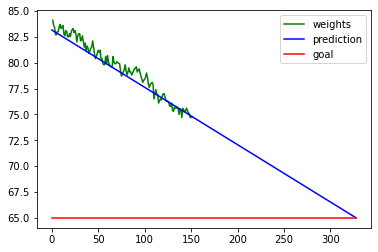

already lost: 18.6 catties
progress: 48.69%
remaining time: 176.72 days


In [4]:
if alpha>0 and beta<0:
    plt.plot(t,w,c='g',label='weights')
    plt.plot([0,T],[alpha,goal],c='b',label='prediction')
    plt.plot([0,T],[goal,goal],c='r',label='goal')
    plt.legend()
    plt.show()
    p=(w[0]-w[-1])/(w[0]-goal)
    print('already lost:',round(2*(w[0]-w[-1]),ndigits=2),'catties')
    print('progress:',str(round(p*100,ndigits=2))+'%')
    print('remaining time:',round(T-t[-1],ndigits=2),'days')
else:
    print('Your weight is going up!!!')

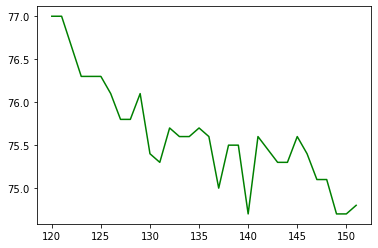

In [5]:
plt.plot(t[-30:],w[-30:],c='g')
plt.show()